## Monopoly estimated wins with Montecarlo
We want to analyze the probability of winning in Monopoly, a board game where players roll two dice and move around a board, buying and trading properties, and developing them with houses and hotels. The game ends when only one player remains, and the winner is the player with the most money and properties.

# Overview of Monopoly (Standard Edition)

## Game Components
- **Board**:
  - 40 spaces:
    - 22 properties (grouped by colors, 2-3 per group).
    - 4 railroads.
    - 2 utilities (Electric Company, Water Works).
    - 6 special spaces: *Chance* (3), *Community Chest* (3).
    - 2 tax spaces (*Luxury Tax*, *Income Tax*).
    - Start, Jail, *Go to Jail*, and Free Parking.

- **Cards**:
  - 16 *Chance* cards.
  - 16 *Community Chest* cards.
  - Title deeds for all properties.

- **Money**:
  - Total of $20,580 in various denominations ($1 to $500).  
    - 1 $: 30
    - 5 $: 30
    - 10 $: 30
    - 20 $: 30
    - 50 $: 30
    - 100 $: 30
    - 500 $: 30
   
- **Tokens**:
  - Up to 8 player tokens.

- **Buildings**:
  - 32 houses, 12 hotels.
  - We will consider to have an ininite amount of houses and hotels

---

## Key Rules
- **Turn Mechanics**:
  - Roll two six-sided dice; move forward the sum of the dice.
  - Rolling doubles grants an extra turn; rolling doubles 3 times sends the player to Jail.
  - Perform actions based on the space landed on.

- **Special Spaces**:
  - *Go*: Collect $200 when passing.
  - *Jail*: Stay up to 3 turns unless paying $50 or using a “Get Out of Jail Free” card.
  - *Go to Jail*: Move directly to Jail.
  - *Free Parking*: No action.
  - We will consider *Go to Jail* a normal location, because it doesn't effect the game in long terms

- **Properties**:
  - Buy unowned properties; pay rent if owned.
  - Rent increases with buildings (houses/hotels).
  - Must own all properties of a color group to build.

- **Cards**:
  - *Chance* and *Community Chest* cards can move players, alter funds, or send to Jail.
  - *Move directly to START* card doesn't work. It's basically uninfluential on the results

- **Objective**:
  - Bankrupt all opponents.

---

## Monte Carlo Simulation
- **Simulation Focus**:
  - Landing probabilities for each space.
  - Cost-benefit analysis of properties.
  - Construction efficiency (houses/hotels).
  - Return on Investment (ROI) by property group.

- **Key Parameters**:
  - Visit probabilities, state transitions, and profitability.

- **Example Iteration**:
  - Simulate N games.
  - Record movements, earnings, and losses.
  - Analyze visit frequencies and profitability distribution.


In [23]:
# LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from prop_and_loc import locations, properties, prop_list, loc_list, dict_by_color
from istances import run_game, random_dist, color_dist

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Results of the single game experiment
These are the final results for the single experiment, each new iteration of the algorithm is different, as we expect it to be, like a real game. These results on their own are not considered relevant for the statistical analysis, we will anlyse that in the next section by using *Monte Carlo simulations*.

At the moment these result should only be useful for a general check onto the algorithm and onto the results of the single simulation.

A few different algorithms have been chosen to make the decision whether or not to buy a property:
the choice on the method is crucial for the outcomes of the experiment.
Let's analyse them:
1) Uniform distributed ROI
2) Color based choice (house building goal)
3) Complex choice function

### **1) Uniform distributed ROI**:
First we want to choose a random function that decides if the player will or will not buy a specific prop.  
  
The method will provide a Random uniform generated value between (0,1), then, with a simple treshold, that could be, eventually, modified, we will decide whether or not to buy the specific prop.  
  
The treshold is initially set on 0.5

Simply by running the program for a few seconds we can have some infos about the actual flow of this method and its problems.  
Basically, the game will never end and wil stop because the limit of cash will be reached.    

This results explains the outcomes of the average Monopoly game played in family, without much strategy.  
The players can't make up a strong attack on their opponents and will rely
 on the safe incomes of some properties ownership. The players won't be able to build houses most of the time and they will accumulate money on their personal balance.  
Eventually the bank will run out of cash (we set 20,580 $ as max, based on a standard Monopoly edition) and the game will end. The winner will be the richest player.

In [24]:
report_to_file = True       

In [25]:
random_ROI = run_game(4, "random", report_to_file)

Report inside file "output_random.txt"

RESUME OF THE GAME:
Game simulation SUCCESSFULL!



### **2) Color based choice**

In [26]:
color_ROI = run_game(4, "color", report_to_file)

Report inside file "output_color.txt"

RESUME OF THE GAME:

Battleship wins the game at turn 180, with a final MONOPOLY of 4343 $

SUMMARY REPORT (property: [owner, n_houses]):

Vicolo Corto: None
Vicolo Stretto: None
Stazione Sud: None
Bastioni Gran Sasso: None
Viale Monterosa: None
Viale Vesuvio: None
Via Accademia: None
Società Elettrica: ['Battleship', 0]
Corso Ateneo: None
Piazza Università: None
Stazione Ovest: None
Via Verdi: ['Battleship', 5]
Corso Raffaello: ['Battleship', 5]
Piazza Dante: ['Battleship', 5]
Via Marco Polo: None
Corso Magellano: None
Largo Colombo: None
Stazione Nord: None
Viale Costantino: None
Viale Traiano: None
Società Acqua Potabile: ['Battleship', 0]
Piazza Giulio Cesare: None
Via Roma: None
Corso Impero: None
Largo Augusto: None
Stazione Est: None
Viale dei Giardini: ['Battleship', 5]
Parco della Vittoria: ['Battleship', 5]

Game simulation SUCCESSFULL!



### **3) Complex choice function**



## Distribution of ROI
### 1) In case of a ROI function uniformly random between (0,1)

***** RANDOM ROI FUNCTION *****

Mean ROI: 0.52
Median ROI: 0.53

Minimum ROI: 0.07
Maximum ROI: 0.98
How many over 0.5 ROI: 50.91 %
Dimension of the ROI array: 55


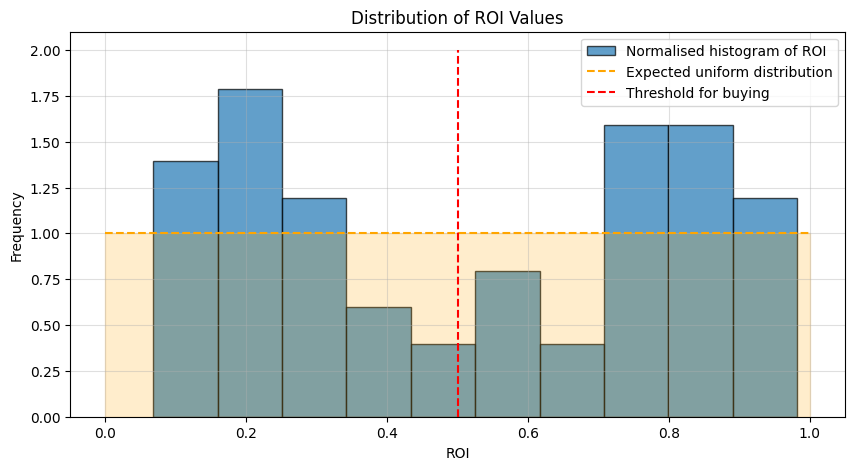

In [27]:
random_dist(random_ROI)

### 2. In case of color based choice ROI evaluation

***** COLOR ROI FUNCTION *****

Mean ROI: 0.31
Median ROI: 0.00

Minimum ROI: 0.00
Maximum ROI: 1.00
How many over 0.2 ROI: 40.54 %
Dimension of the ROI array: 74


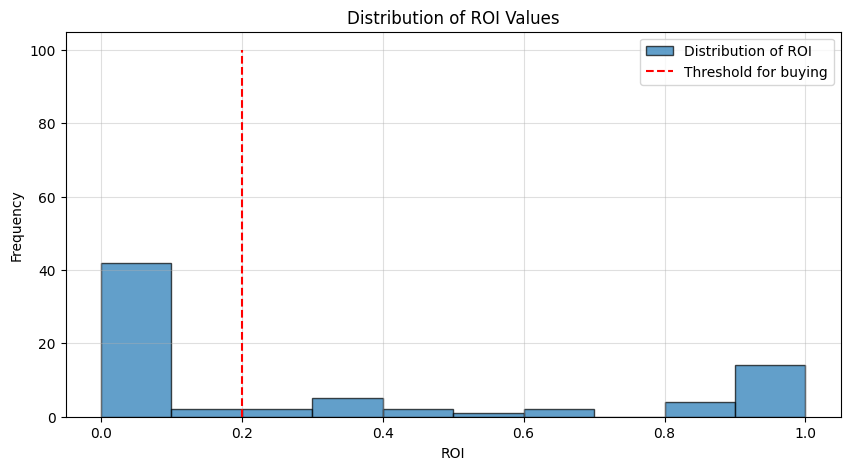

In [28]:
color_dist(color_ROI)

## Monte Carlo simulations
Now we provided a sample of a random game but we head towards the analysis of a large simulation that could eventually provide us some interesting and relevant results.  
It's possible to save the charts as images in the appropriate folder rather than print them to screen 

In [29]:
%reload_ext autoreload

from montecarlo import montecarlo_run as mc
from data_analysis import analiser

### 1) In case of a ROI function uniformly random between (0,1)

For the analysis of a specific configuration

In [48]:
# MONTECARLO SIMULATION

num_sim = 100
num_players = 4
save_to_folder = True

rn_datapack = mc(num_sim, num_players, "random")

In [49]:
# DATA ANALYSIS

rn_analised = analiser(num_sim, num_players, rn_datapack, "random", save_to_folder)
if save_to_folder:
    rn_analised.complete_analysis()

Report inside file "output_random.txt"


For the complete analysis of the phenomenon, with the number of players that changes (from 1 to 8)

In [50]:

for num_players in range(2, 9):
    
    print(f"\n----------------------------------------------------------\nNumber of players: {num_players}\n")
    rn_datapack = mc(num_sim, num_players, "random")
    rn_analised = analiser(num_sim, num_players, rn_datapack, "random", save_to_folder, single=False)
    rn_analised.complete_analysis()


----------------------------------------------------------
Number of players: 2

Report inside file "output_random.txt"

----------------------------------------------------------
Number of players: 3

Report inside file "output_random.txt"

----------------------------------------------------------
Number of players: 4

Report inside file "output_random.txt"

----------------------------------------------------------
Number of players: 5

Report inside file "output_random.txt"

----------------------------------------------------------
Number of players: 6

Report inside file "output_random.txt"

----------------------------------------------------------
Number of players: 7

Report inside file "output_random.txt"

----------------------------------------------------------
Number of players: 8

Report inside file "output_random.txt"


### 2. In case of color based choice ROI evaluation

For the analysis of a specific configuration

In [33]:
# MONTECARLO SIMULATION

rn_datapack = mc(num_sim, num_players, "color")

In [34]:
# DATA ANALYSIS

rn_analised = analiser(num_sim, num_players, rn_datapack, "color", save_to_folder)
if save_to_folder:
    rn_analised.complete_analysis()

Report inside file "output_color.txt"

RESUME OF THE GAME:


For the complete analysis of the phenomenon, with the number of players that changes (from 1 to 8)

In [35]:
for num_players in range(2, 9):
    print(f"\n----------------------------------------------------------\nNumber of players: {num_players}\n")
    rn_datapack = mc(num_sim, num_players, "random")
    rn_analised = analiser(num_sim, num_players, rn_datapack, "random", save_to_folder, single=False)
    rn_analised.complete_analysis()


----------------------------------------------------------
Number of players: 2

Report inside file "output_random.txt"

RESUME OF THE GAME:

----------------------------------------------------------
Number of players: 3

Report inside file "output_random.txt"

RESUME OF THE GAME:

----------------------------------------------------------
Number of players: 4

Report inside file "output_random.txt"

RESUME OF THE GAME:

----------------------------------------------------------
Number of players: 5

Report inside file "output_random.txt"

RESUME OF THE GAME:

----------------------------------------------------------
Number of players: 6

Report inside file "output_random.txt"

RESUME OF THE GAME:

----------------------------------------------------------
Number of players: 7

Report inside file "output_random.txt"

RESUME OF THE GAME:

----------------------------------------------------------
Number of players: 8

Report inside file "output_random.txt"

RESUME OF THE GAME:
